# Coffee and Productivity

Andrew Branch

Does coffee consumption in a population correlate with higher productivity as measured in GDP per hour worked?

Background: On an individual level, consumption of coffee and its active ingredient, caffeine (a stimulant), is associated with higher levels of “energy” and “productivity”. But in a given population, such as a nation-state, does higher coffee consumption indicate a higher level of productivity? 


In [20]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from numpy.polynomial.polynomial import polyfit

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
coffee_data_to_load = "data/project_data.csv"

# Read the Data
coffee_data = pd.read_csv(coffee_data_to_load)


#coffee_data.head()
# plt.rcParams["figure.figsize"] = 16,9

# Some srini stuff
#coffee_data.head()
#coffee_data.columns
# plt.rcParams["figure.figsize"] = 16,9

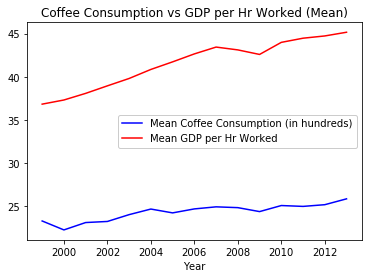

## 1-1. World Coffee Consumption by Year: Does World Consume More Coffee Over Time?
mean coffee consumption by year (line graph) - 
x axis = year
y axis = coffee amount
Karen

In [1]:
# KarenM 
# Commit eab341c
year = per_capita_coffee_data.iloc[:,1].unique()

In [ ]:
avg_coffee_consumption = round(per_capita_coffee_data.groupby("Year")["Coffee Consumed"].mean(),2)
#avg_coffee_consumption

In [ ]:
country = per_capita_coffee_data.iloc[:, 0].unique()
#country

In [ ]:
avg_coffee_consumption_ctry = round(per_capita_coffee_data.groupby(["Country Name", "Year"])["Coffee Consumed"].mean(),2)
#avg_coffee_consumption_ctry.head()

In [10]:
# Commit eab341c
# Create line graph to illlustrate mean coffee consumption by year

coffee_consumption_by_ctry_per_capita = per_capita_coffee_data[["Country Name","Year","Coffee Consumed per Capita in Kg"]]

coffee_consumption_pivot_per_capita = coffee_consumption_by_ctry_per_capita.pivot(index="Year", columns="Country Name", values="Coffee Consumed per Capita in Kg")

avg_cofee_consumption_data = coffee_consumption_pivot_per_capita.mean(axis=1)

plt.plot(year, avg_cofee_consumption_data, linewidth=1, marker="o")
plt.title("World Coffee Consumption by Year",{"fontsize":16})
plt.ylabel("Average Yearly Coffee Consumption (Kg)")
plt.xlabel("Year")
#set_xlim(min(year), max(year)
       
# Create line graph
#plt.savefig(avg_coffee_consumption_per_capita)
plt.show()

NameError: name 'per_capita_coffee_data' is not defined

In [ ]:
coffee_consumption_pivot_per_capita

In [ ]:
# Create line graph for coffee consumption per capita for all countries


cons_per_capita_by_ctry = coffee_consumption_pivot_per_capita.plot.line(linewidth=1, marker="o")

plt.title("Yearly Coffee Consumption by Country",{"fontsize":16})
plt.ylabel("Yearly Coffee Consumption per Capita (kg)")
plt.xlabel("Year")
plt.show()

In [ ]:
#plt.boxplot(coffee_consumption_pivot_per_capita)


boxplot = coffee_consumption_pivot_per_capita.boxplot(return_type='axes')

plt.title("Yearly Coffee Consumption by Country",{"fontsize":16})
plt.ylabel("Yearly Coffee Consumption per Capita (kg)")
plt.xlabel("Year")
plt.show()

In [ ]:
import seaborn as sns
sns.set(style="whitegrid")

ax = sns.boxplot(x="Year", y="Coffee Consumed per Capita in Kg", data=per_capita_coffee_data, palette="Set1")
ax = sns.swarmplot(x="Year", y="Coffee Consumed per Capita in Kg", data=per_capita_coffee_data, color=".25")

## 1-2. Coffee Consumption Trend by Country: How Much Coffee Is Consumed by Year (in Total)?
use project_data.csv to generate the plot. (line graph) - mean by year. 
Plot in line.
Karen

,Country Name,Year,Coffee Consumed,MEASURE,gdp_per_hour_worked,gdp_for_year,gdp_per_capita,population,Unemployed (%)
0,Austria,1999,1123,USD,43.67,217185787343,28722,7561609,3.7
1,Austria,2000,875,USD,44.71,196799778883,25922,7592073,3.5
2,Austria,2001,1013,USD,45.28,197337879195,25848,7634560,3.6
3,Austria,2002,926,USD,46.14,213377771504,27772,7683162,4.0
4,Austria,2003,720,USD,46.51,261695778781,33889,7722033,4.3


In [12]:

coffee_by_country = coffee_data.groupby(["Country Name"])

## 3-1. Overall Productivity Trend: Does Productivity Grow by Year? (Growth in labour productivity indicates a higher level of output for every hour worked)
mean productivity (line plot)
x axis = year
y axis = GDPhrwkd
Jin

In [ ]:
# From JK Branch
# Commit #03f2a36

# Store the Productivity(GDP per hour worked) Data Grouped by Country and Year 
productivity_trend = coffee_data[["Country Name","Year","gdp_per_hour_worked"]]

# Preview DataFrame
df_productivity_trend =productivity_trend.pivot(index="Year", columns="Country Name", values="gdp_per_hour_worked")

# Generate the Plot (with Error Bars)
graph_productivity_trend = df_productivity_trend.mean(axis=1).plot()

#style
graph_productivity_trend.set_ylabel("Productivity (GDP per hour worked)")
graph_productivity_trend.set_xlabel("Year")

# Draw line of overall coffee consumption 
# df_productivity_trend.mean(axis=1).plot()

# Save the Figure
#plt.savefig('graph_productivity_trend.png', bbox_inches="tight")


## 3-2. Productivity Trend by Country: How Does Productivity Change by Country Over Time?
use project_data.csv to generate the plot. (line graph)  - GDP per hour worked
Jin

In [9]:
# Generate the Plot 
graph_productivity_by_country = df_productivity_trend.plot()

#style
graph_productivity_by_country.set_ylabel("Productivity (GDP per hour worked)")
graph_productivity_by_country.set_xlabel("Year")

# Draw line of coffee consumption by country
# df_productivity_trend.plot()

# Save the Figure
#plt.savefig('graph_productivity_by_country.png', bbox_inches="tight")

# Show the Figure
#plt.show()

NameError: name 'df_productivity_trend' is not defined

#3-3. Overall Trend: The Mean of Coffee Consumption and the Mean of Productivity by Year (Together)

In [ ]:
# Store the Coffee Consumption Data Grouped by Country and Year 
coffee_consumption_trend = coffee_data[["Country Name","Year","Coffee Consumed"]]

# Preview DataFrame
df_coffee_consumption = coffee_consumption_trend.pivot(index="Year", columns="Country Name",values="Coffee Consumed")

# Draw line of overall coffee consumption and productivity (multiple axis with different scales)

df_coffee_consumption.mean(axis=1).plot(label="Coffee Consumed (thousand in 60kg bag)", legend=True)
df_productivity_trend.mean(axis=1).plot(secondary_y=True, label="Productivity (GDP per hour worked)", legend=True)

## 2. Top Coffee Drinking Nations (per Capita, kg or lb): Which Country Drinks Coffee the Most per Person in 20XX?
use project_data.csv to generate the plot. (bar graph) - top 10? 
Srini

In [ ]:
# Commit f395f28
# Top 10 cofee drinking nations
group_by_country = coffee_data.groupby(["Country Name"])
#Mean of all values by country
mean_values_country = group_by_country.mean()
mean_values_country_df = pd.DataFrame(mean_values_country)
# Top 10 countries copee per capita
top_coffee_pc = mean_values_country_df.sort_values("Coffee Consumed per Capita in Kg", ascending = False)\
.head(10).reset_index()
top_coffee_pc

In [ ]:
#top 10 Coffee drinking per capita graph
plt.figure(figsize=(20,8))
sns.set(style="whitegrid")
g=sns.barplot(x='Country Name',y='Coffee Consumed per Capita in Kg',data=top_coffee_pc, palette="Blues_d")
plt.xticks(rotation=45)
plt.title("Top 10 Countries By Cofee Consumed Per Capita in Kgs", size =20)
plt.savefig("Top_10_Coffee.png")
plt.show()

## 4. Top Productivity Countries in 20XX: Which Countries Show Higher Productivity Compare to Other Countries?
use project_data.csv to generate the plot. (bubble plot)
x axis = countries
y axis = productivity (GDPhrworkd)
bar graph or scatter plot
all countries in data
Srini

In [ ]:
# Commit f395f28
# Top 10 productivity countries per capita
top_productivity_pc = mean_values_country_df.sort_values("gdp_per_hour_worked ($)", ascending = False)\
.head(10).reset_index()
top_productivity_pc
#top 10 Coffee drinking per person graph
sns.set(style="whitegrid")
plt.figure(figsize=(20,8))
g=sns.barplot(x='Country Name',y='gdp_per_hour_worked ($)',data=top_productivity_pc, palette="Greens_d")
plt.xticks(rotation=45)
#plt.grid(True)
plt.title('Top 10 Countries By Productivity GDP Per Hour Worked', size =20)
plt.savefig("Top_10_Productive.png")
plt.show()

In [ ]:
# Top 10 productive nations
group_by_country = coffee_data.groupby(["Country Name"])

# Mean productivity by coungry
productivity_per_person = group_by_country["gdp_per_hour_worked ($)"].mean()
productivity_per_person_df = pd.DataFrame(productivity_per_person)
#productivity_per_person_df.head()
top_productive = productivity_per_person_df.sort_values("gdp_per_hour_worked ($)",\
                                                        ascending = False).head(10).reset_index()
#top_productive
plt.figure(figsize=(20,8))
g=sns.barplot(x='Country Name',y='gdp_per_hour_worked ($)',data=top_productive, palette="Blues_d")

for index, row in top_productive.iterrows():
    g.text(row.name,row.tip,round(row.['gdp_per_hour_worked ($)'],2), color='black', ha="center")
plt.title('Top 10 Countries By Productivity')
plt.savefig("Top_10_Productive.png")
plt.show()

## 5-1. Moved to 5.2


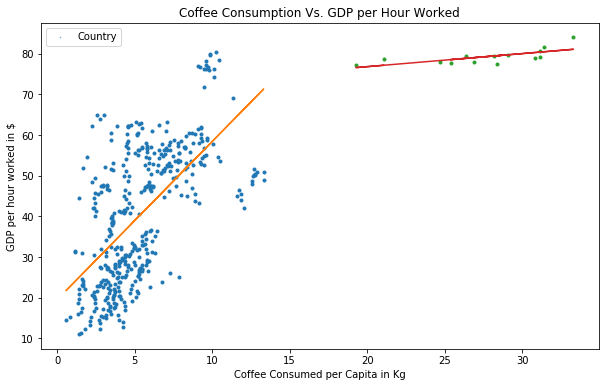

In [68]:
# define x-axis and y-axis
x = coffee_data["Coffee Consumed per Capita in Kg"]
y = coffee_data["gdp_per_hour_worked"]


x_smaller = x.iloc[x.values < 15]
y_smaller = y.loc[x_smaller.index.tolist()]

x_larger = x.iloc[x.values >= 15]
y_larger = y.iloc[x_larger.index.tolist()]

plt.scatter(x, y, s=2, marker='.', alpha=0.5, label="Country")
plt.xlabel('Coffee Consumed per Capita in Kg')
plt.ylabel('GDP per hour worked in $')
plt.legend(loc="best")
plt.title('Coffee Consumption Vs. GDP per Hour Worked')
# Fit with polyfit
b_smaller, m_smaller = polyfit(x_smaller, y_smaller, 1)
b_larger, m_larger = polyfit(x_larger, y_larger, 1)

plt.plot(x_smaller, y_smaller, '.')
plt.plot(x_smaller, b_smaller + m_smaller * x_smaller, '-')

plt.plot(x_larger, y_larger, '.')
plt.plot(x_larger, b_larger + m_larger * x_larger, '-')

plt.show()

## 5-2. Correlation of Changes in Coffee Consumption and Productivity: Does the Changes in the Coffee Consumption Correlated with the Changes in Productivity throughout Certain period? (dynamic analysis, Pick countries which show bigger changes in values) 
use project_data.csv to generate the plot. (scatter plot and regression)

x axis = country 
y axis = gdphrwkd
calculate the increased/decreased value of consumption
calculate the increased/decreased value of GDPhrwkd
ex: all years or 10 years (if plot is too busy) or in some increment (2 years, 5 years)?
look for dramatic changes
Michael


# Mean Coffee Consumption and Mean GDPhrwkd


In [6]:
# Some andrew stuff
# Trend: Mean coffee and mean gdphrwkd globally
agg_mean_coffee = coffee_data.groupby(["Year"]).aggregate({'Coffee Consumed':'mean',
                                                                          'gdp_per_hour_worked':'mean',
                                                                          })

coffee_df = agg_mean_coffee.reset_index()
coffee_df.head()

,Year,Coffee Consumed,gdp_per_hour_worked
0,1999,2327.862069,36.818621
1,2000,2224.300000,37.298667
2,2001,2309.700000,38.066333
3,2002,2322.266667,38.938667
4,2003,2401.366667,39.793667


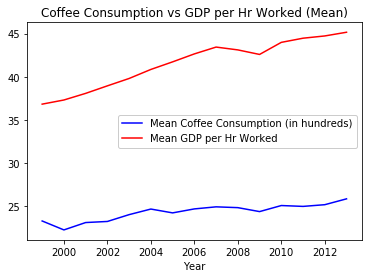

In [7]:
# plotting the lines
# We show consumption in hundreds, in order to scale with the 

x_axis = coffee_df["Year"]
coffee_y = coffee_df["Coffee Consumed"]/100
gdp_y = coffee_df["gdp_per_hour_worked"]

coffee_plt, = plt.plot(x_axis, coffee_y, color='blue', label="Mean Coffee Consumption (in hundreds)")
gdp_plt, = plt.plot(x_axis, gdp_y, color='red', label="Mean GDP per Hr Worked")
plt.title("Coffee Consumption vs GDP per Hr Worked (Mean)")
plt.xlabel("Year")

plt.legend(loc="right", framealpha=1)
plt.show()

## 6-1. Correlation Between Coffee Consumption and Productivity: Is P-Value < 0.05 and Can We Reject Null-Hypothesis(H0)? (Hypothesis Test)
P-Value graph


Andrew

In [17]:
x_axis = coffee_df["Year"]
plots = coffee_df["gdp_per_hour_worked"]
(slope, intercept, _, _, _) = linregress(x_axis, plots)
fit = slope * x_axis + intercept

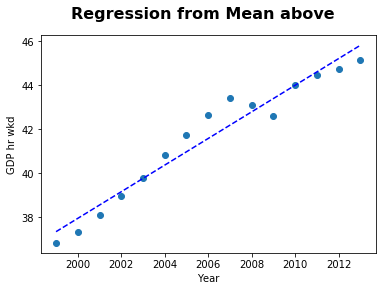

In [18]:
fig, ax = plt.subplots()

fig.suptitle("Regression from Mean above", fontsize=16, fontweight="bold")

#ax.set_xlim(0, 1000)
#ax.set_ylim(0, 10)

ax.set_xlabel("Year")
ax.set_ylabel("GDP hr wkd")

ax.plot(x_axis, plots, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

plt.show()

In [19]:
s1 = coffee_df["Coffee Consumed"]/100
s2 = coffee_df["gdp_per_hour_worked"]

In [20]:
(t_stat, p) = stats.ttest_ind(s1, s2, equal_var=False)
print("t-statistics is {}.".format(t_stat))
print("p-value is {}.".format(p))

t-statistics is -22.680621963678902.
p-value is 2.5277418359359207e-14.


## 6-2. Correlation Between the Changes in the Coffee Consumption and the Changes in Productivity: Is P-Value < 0.05 and Can We Reject Null-Hypothesis(H0)? (Hypothesis Test)

Different from 6-1. 
This is for the "rate of change" in 5-2
Andrew

In [30]:
coffee = coffee_df["Coffee Consumed"]/100
gdp = coffee_df["gdp_per_hour_worked"]
rc_coffee = coffee.pct_change()
rc_gdp = gdp.pct_change()
rc_coffee.head(), rc_gdp.head()

(0         NaN
 1   -0.044488
 2    0.038394
 3    0.005441
 4    0.034062
 Name: Coffee Consumed, dtype: float64, 0         NaN
 1    0.013038
 2    0.020582
 3    0.022916
 4    0.021958
 Name: gdp_per_hour_worked, dtype: float64)

In [31]:
(t_stat, p) = stats.ttest_ind(coffee, gdp, equal_var=False)
print("t-statistics is {}.".format(t_stat))
print("p-value is {}.".format(p))

t-statistics is -22.680621963678902.
p-value is 2.5277418359359207e-14.


## 7. Correlation Between Coffee Consumption and Unemployment: A question needs to be defined (optional)
use project_data.csv to generate the plot. 


## 8. World Coffee Major Producers as % of World: Which Countries Produce Coffee? (optional)
use exports data from www.ico.org/new_historical.asp to generate the plot.(pie chart or bubble map??)

## Conclusions
Summary of findings - Andrew

In [ ]:
# DATA Source
http://www.ico.org/new_historical.asp
https://knoema.com/search?query=coffee&source=HomePage
https://www.worldatlas.com/articles/top-10-coffee-consuming-nations.html
https://fusiontables.google.com/DataSource?docid=1C-fn6nSe21acP0xJIO1T1x0wohqfMYCQyJjbqdk#rows:id=1
https://data.oecd.org/lprdty/gdp-per-hour-worked.htm
https://www.oecd-ilibrary.org/employment/data/oecd-productivity-statistics/gdp-per-capita-and-productivity-growth_data-00685-en